In [1]:
import coffea
from git import Repo
import awkward
import uproot
import hist
import mplhep as hep
import matplotlib.pyplot as plt
mod = "Prayag Yadav"
local_repo = Repo(path='coffea')
local_branch = local_repo.active_branch.name
print("_______________________________________")
print("\tCurrent Configuration")
print("---------------------------------------")
print("Coffea Version: ", coffea.__version__)
print("Branch: \t", local_branch)
print("Modified by: \t", mod)
print("_______________________________________")


_______________________________________
	Current Configuration
---------------------------------------
Coffea Version:  0.1.dev3583+ge06c4b8
Branch: 	 master
Modified by: 	 Prayag Yadav
_______________________________________


In [2]:
from coffea.nanoevents import NanoEventsFactory, FCC
test_file = '../../../coffea-fcc-analyses/data/p8_ee_ZH_ecm240/events_082532938.root' # Has 100k events
#test_file = './test_Spring2021.root' #Has 100 events
file = uproot.open(test_file)

events = NanoEventsFactory.from_root(
    test_file+":events",
    # entry_stop=10000,
    schemaclass= FCC.get_schema(version="latest"),
    delayed = False,
    metadata=file["metadata"].arrays()
).events()

file.close()

/home/prayag/coffeafcc/development/coffea/src/coffea/nanoevents/schemas/fcc.py:4: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


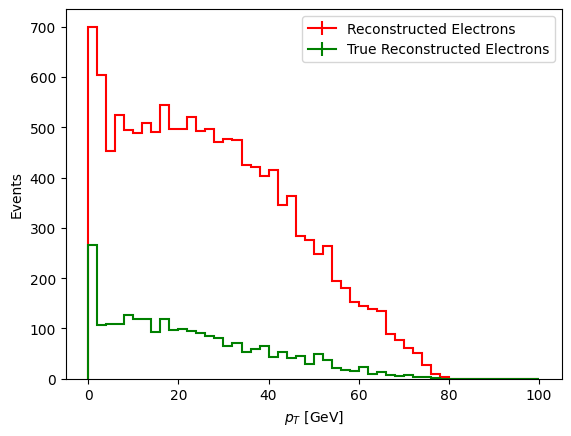

In [3]:
# Generated using 100k events
electrons = events.ReconstructedParticles.match_collection(events.Electronidx0)
mc_electrons = electrons.matched_gen[abs(electrons.matched_gen.PDG) == 11 ]

reco_electrons = hist.Hist.new.Reg(50,0,100).Double().fill(awkward.flatten(electrons.pt))
true_electrons = hist.Hist.new.Reg(50,0,100).Double().fill(awkward.flatten(mc_electrons.pt))

fig,ax = plt.subplots()
hep.histplot(
    [reco_electrons,true_electrons],
    label=['Reconstructed Electrons','True Reconstructed Electrons'],
    color=['red','green'],
    yerr=0,
    ax=ax
)
ax.set_xlabel('$p_T$ [GeV]')
ax.set_ylabel('Events')
ax.legend();

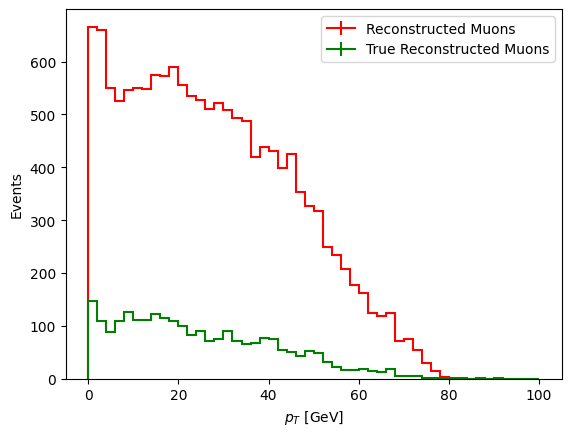

In [4]:
# Generated using 100k events
muons = events.ReconstructedParticles.match_collection(events.Muonidx0)
mc_muons = muons.matched_gen[abs(muons.matched_gen.PDG) == 13 ]

reco_muons = hist.Hist.new.Reg(50,0,100).Double().fill(awkward.flatten(muons.pt))
true_muons = hist.Hist.new.Reg(50,0,100).Double().fill(awkward.flatten(mc_muons.pt))

fig,ax = plt.subplots()
hep.histplot(
    [reco_muons,true_muons],
    label=['Reconstructed Muons','True Reconstructed Muons'],
    color=['red','green'],
    yerr=0,
    ax=ax
)
ax.set_xlabel('$p_T$ [GeV]')
ax.set_ylabel('Events')
ax.legend()

#### Looks Problematic, how can there be so many fakes? Something wrong in my implementations??